In [1]:
import sys
import json
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append('../')

from config import ROOT_DIR

%matplotlib inline
sns.set_theme(font_scale=1.2,
              style='whitegrid',
              palette='plasma')

In [2]:
with open(ROOT_DIR / 'Source/models/GCNN_FCNN/skipatom_vectors_dim200.json') as js:
    skipatom = json.load(js)

df = pd.DataFrame(skipatom).T
df

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
Si,-0.087476,-0.113530,0.683784,-0.115143,0.256866,0.371400,0.827496,0.124815,0.491072,0.054363,...,-0.562476,0.008938,0.108588,0.424901,-0.043199,0.031422,0.196428,0.082492,0.136750,0.161687
C,0.112071,-0.038513,-0.296220,0.002487,0.057726,-0.034794,-0.013218,0.000351,0.215646,-0.134241,...,0.095309,-0.061688,0.040487,-0.004082,0.063933,0.048242,0.053411,-0.199611,-0.053598,-0.042667
Pb,0.010565,0.000567,-0.024322,0.091481,0.011900,0.035573,0.046909,0.060997,-0.015006,-0.041177,...,0.013453,0.047558,-0.035313,-0.054176,0.656703,-0.075652,0.222317,0.016812,0.054827,0.007534
I,0.117050,-0.653851,0.038376,0.017480,-0.319311,0.038648,0.024182,0.274002,-0.338599,0.264151,...,0.308040,0.474635,0.071847,0.774654,-0.468483,0.037142,-0.337218,-0.052307,0.134162,-0.068843
Br,0.720670,-0.981011,0.602329,0.109889,-0.634643,-0.470527,0.093944,0.714649,-0.251394,-0.078488,...,0.053918,0.894012,0.113244,0.940484,-0.704226,0.191853,-0.616143,0.519690,0.452298,-0.199654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cm,-0.338498,0.080245,-0.283360,-0.133934,-0.020348,0.351064,-0.007519,0.074560,-1.108793,0.219178,...,0.279758,-0.038311,0.057169,-0.062557,-0.058113,0.056857,-0.097741,-0.200079,0.123321,-0.067003
Am,-0.157853,-0.025843,-0.207470,0.031205,0.013934,0.159368,-0.010743,0.057625,-1.194746,0.184559,...,0.472101,0.084332,0.042680,-0.036208,-0.049788,0.047718,-0.136861,-0.244511,0.140570,-0.039828
Ra,0.069349,0.081868,-0.074071,-0.273633,0.000489,0.064780,-0.103049,-0.055779,-0.049763,0.082233,...,-0.205156,-0.012257,0.032921,0.111277,-0.154401,0.078558,0.098771,-0.127520,-0.103996,0.133249
Bk,-0.374828,0.039469,-0.144582,-0.085379,-0.206801,0.319805,-0.034843,0.003609,-1.168935,0.236452,...,0.032000,-0.101930,0.046593,-0.149861,-0.252197,-0.350634,-0.181285,-0.394437,0.201141,-0.033027


Text(0.5, 1.0, 't-SNE of SkipAtom(dim: 200)')

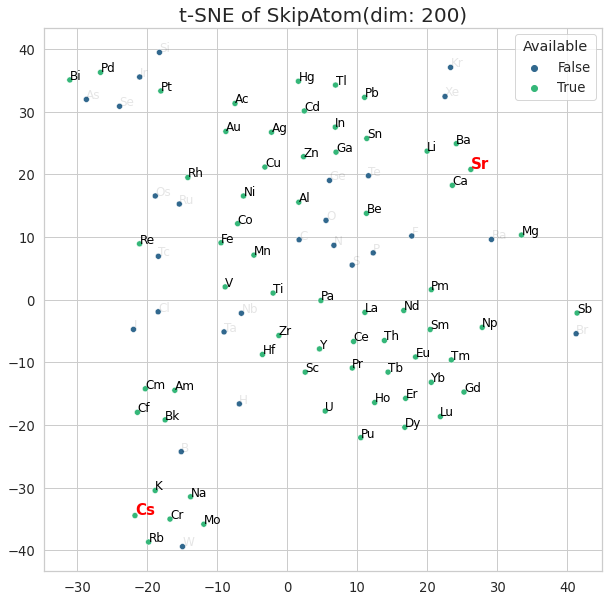

In [5]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state=322).fit_transform(df)
tsne = pd.DataFrame(tsne, index=df.index)

available_metals = [x.split('.')[0] for x in os.listdir(ROOT_DIR/'Data/OneM_cond_adds') if '.sdf' in x]
tsne['Available'] = [(x in available_metals) for x in df.index]
tsne



fig, ax = plt.subplots(figsize=(10, 10))
x, y = tsne[0].values, tsne[1].values
sns.scatterplot(data=tsne, x=0, y=1, ax=ax, hue='Available', palette='viridis')
ax.set_xlabel('')
ax.set_ylabel('')

for key, x_, y_ in zip(df.index, x, y):
    color = 'black'
    fontsize = 12
    weight = 'light'
    alpha=0.1 if key not in available_metals else 1
    
    if key in ['Cs', 'Sr']:
        color = 'red'
        weight = 'heavy'
        fontsize = 15
        
    ax.annotate(text=key, xy=(x_, y_+0.1), color=color, fontsize=fontsize, alpha=alpha, weight=weight)

#ax.set_xlim(-300, 300)
#ax.set_ylim(-200, 200)
#ax.annotate(text='Lu: (-777, -441)', xy=(-290, -180), fontsize=16, color='green')

ax.set_title('t-SNE of SkipAtom(dim: 200)', fontsize=20)

In [259]:
fig.savefig(ROOT_DIR/'Images/skipatom_tsne.png')
fig.savefig(ROOT_DIR/'Images/skipatom_tsne.pdf')
fig.savefig(ROOT_DIR/'Images/skipatom_tsne.svg')

In [184]:
'Na K Mo Cr Rb'.split()

['Na', 'K', 'Mo', 'Cr', 'Rb']

In [19]:
avail_df = tsne.loc[tsne.Available].drop('Available', axis=1)
len_ = len(avail_df.index)
avail_df

,0,1
Pb,11.039433,32.297047
Eu,18.326185,-9.147020
Fe,-9.478798,9.080408
Sb,41.403023,-2.131243
In,6.850423,27.543941
...,...,...
Ac,-7.477392,31.324940
Cm,-20.290098,-14.226471
Am,-16.075405,-14.469111
Bk,-17.456797,-19.191872
